# Common Libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import gridspec
import math
%matplotlib inline

# Plots functions

In [2]:
def plot_3d(xs, ys, zs, title, fig=(4,8)):    
    fig=plt.figure(figsize=fig)
    ax=Axes3D(fig)
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_zlabel('z', fontsize=15)
    plt.tick_params(labelsize=15)
    ax.set_title(title, fontsize=15)
    plt.show()

# Recurrence Plot

In [3]:
def rec_plot(arr_dimension_1, eps=None, steps=None):
    """
    Função para plotar gráficos de recorrência
    https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
    """
    if eps is None: eps=0.01
    if steps is None: steps=10
    N = arr_dimension_1.size
    arr = np.repeat(arr_dimension_1[None,:], N, axis=0)
    arr_abs = np.abs(arr - arr.T)
    arr_select = np.floor(arr_abs / eps)
    arr_select[ arr_select > steps ] = steps
    return arr_select[::-1,:]

In [4]:
def recurrence_plot_char_1d(arr, f=rec_plot, eps=None, steps=None, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize) 
    #gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], height_ratios=[4, 1]) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    
    ax1.plot(arr)
    ax1.set_title('Time Series')
    ax1.set_xlabel('time')
    ax1.set_ylabel('value')
    
    ax2.imshow(f(arr, eps=eps, steps=steps), cmap='gray', extent=[0, arr.shape[0], 0, arr.shape[0]])
    ax2.set_title('Recurrence Plot')
    ax2.set_xlabel('time')
    ax2.set_ylabel('time')
    
    plt.show()

In [5]:
def recurrence_plot_char_3d(arr, f=rec_plot, eps=None, steps=None, figsize=(16, 6)):

    fig = plt.figure(constrained_layout=True, figsize=figsize)
    gs = gridspec .GridSpec(3, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[2, 0])
    ax4 = fig.add_subplot(gs[:, 1])
    
    def set_axis_info(ax, ar, i, subtitle, x_label=None):
        ax.plot(arr[i])
        ax.set_title(subtitle)
        if x_label is not None:
            ax.set_xlabel(x_label)
        ax.set_ylabel('value')
        return ax
    
    ax1 = set_axis_info(ax1, arr, 0, 'X Axis')
    ax2 = set_axis_info(ax2, arr, 1, 'Y Axis')
    ax3 = set_axis_info(ax3, arr, 2, 'Z Axis', x_label='time')
    
    ax4.imshow(f(arr[0], eps=eps, steps=steps), cmap='gray', extent=[0, arr[0].shape[0], 0, arr[0].shape[0]])
    ax4.set_title('Recurrence Plot')
    ax4.set_xlabel('time')
    ax4.set_ylabel('time')
    

    # fig.suptitle("GridSpec")
    plt.show()

### Dados aleatórios

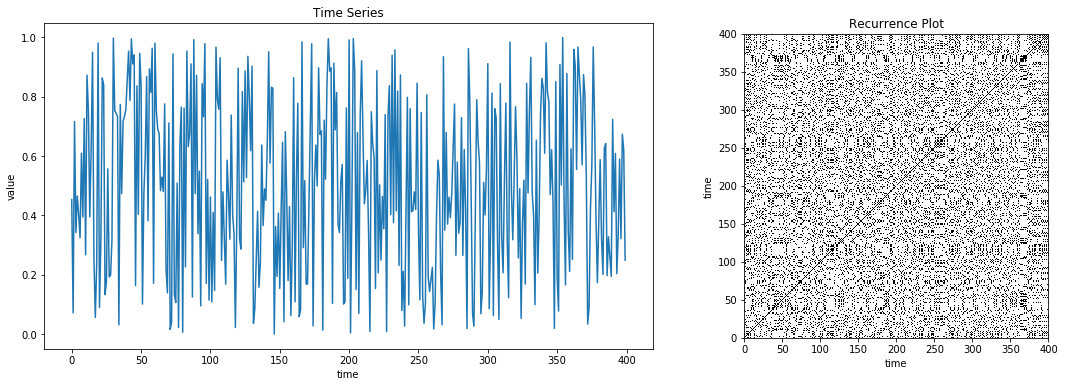

In [6]:
uniform = np.random.random(400)
recurrence_plot_char_1d(uniform, eps=0.1, steps=1, figsize=(18, 6))

### Dados Brownianos

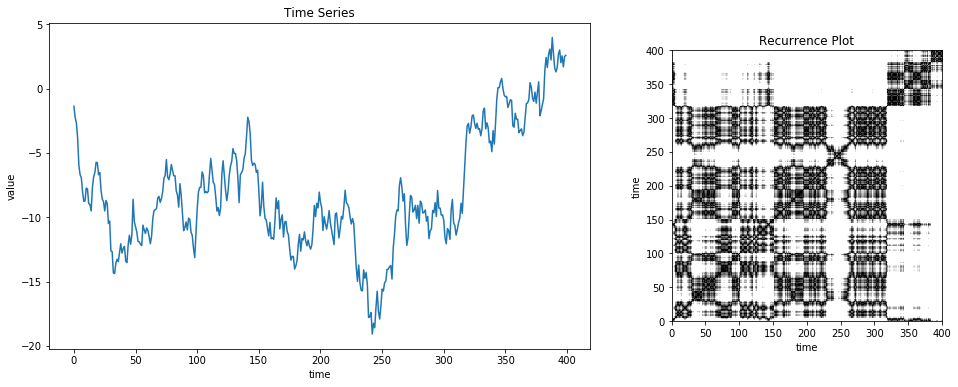

In [7]:
brownian = np.cumsum(np.random.normal(0,1,400))
recurrence_plot_char_1d(brownian, eps=0.2, steps=20, figsize=(16, 6))

### Seno

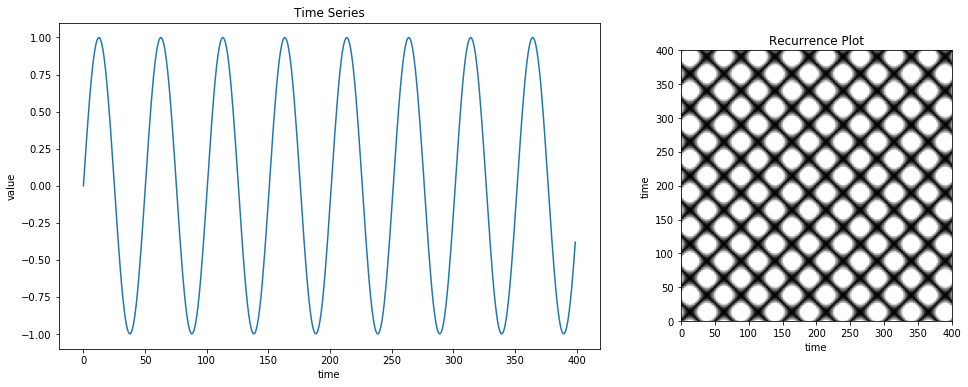

In [8]:
sin = np.sin(np.arange(0,50,0.125))
recurrence_plot_char_1d(sin, eps=0.01, steps=100, figsize=(16, 6))

### Mapa Logístico

In [9]:
def f(x, r=4, c=0.01, i=0):
    return r * x * (1 - x) + (c * i)

def log_map(x0=0.49, r=4, c=0.01, n=1):
    x = x0
    serie = []
    for i in range(n):
        serie.append(x + c * i)
        x = f(x)
    return serie

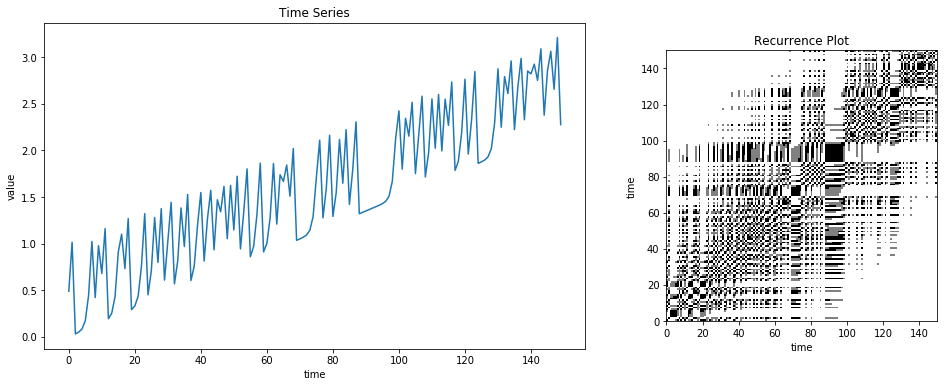

In [10]:
logistic = np.array(log_map(0.49, r=4, n=150, c=0.015))
recurrence_plot_char_1d(logistic, eps=0.2, steps=2, figsize=(16, 6))

# Rössler Atractor

In [6]:
def rossler(dt=0.01, step_count = 5000, a = 0.2, b=0.2, c=6.3):
    def _rossler(x, y, z, a = 0.2, b=0.2, c=6.3):
        """The Rössler equations."""
        x_dot = - y - z
        y_dot = x + a * y
        z_dot = b + x * z - c * z
        return x_dot, y_dot, z_dot
    
    xs=np.empty((step_count + 1,))
    ys=np.empty((step_count + 1,))
    zs=np.empty((step_count + 1,))
    # The initial conditions.
    xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
    # Iterate.
    for i in range(step_count):
        x_dot, y_dot, z_dot = _rossler(xs[i], ys[i], zs[i], a, b, c)
        xs[i+1] = xs[i] + (x_dot*dt)
        ys[i+1] = ys[i] + (y_dot*dt)
        zs[i+1] = zs[i] + (z_dot*dt)
    return xs, ys, zs

Criando um sequência de 50.000 pontos

In [12]:
xs, ys, zs = rossler(dt=0.01, step_count = 10000, a = 0.15, b=0.2, c=10)

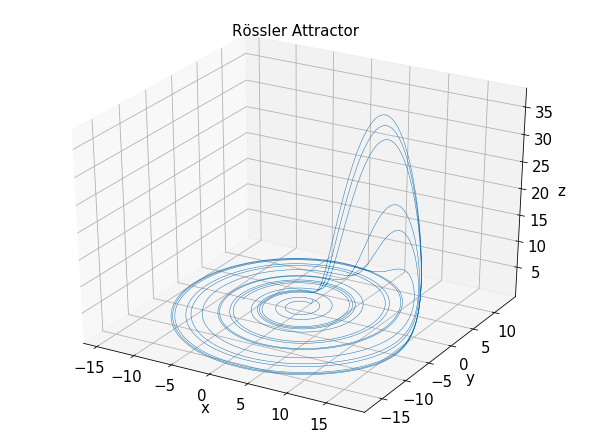

In [13]:
plot_3d(xs, ys, zs, title='Rössler Attractor', fig=(8,6))

### Recurrence Plot do eixo X do Atrator de Rössler

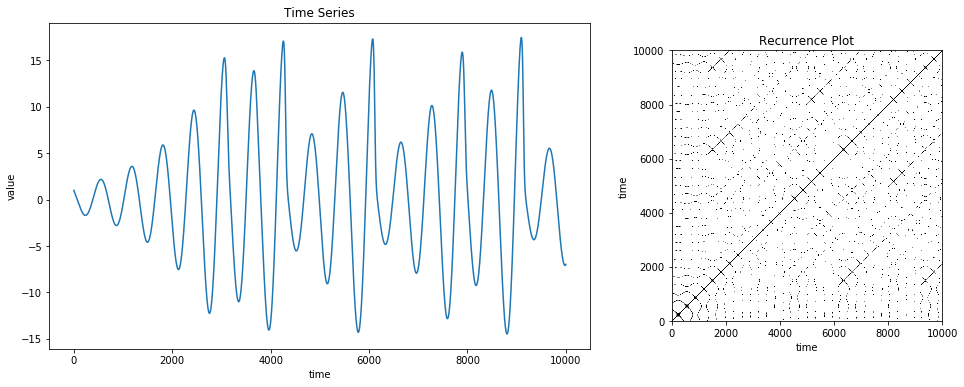

In [14]:
recurrence_plot_char_1d(xs, eps=0.2, steps=2, figsize=(16, 6))

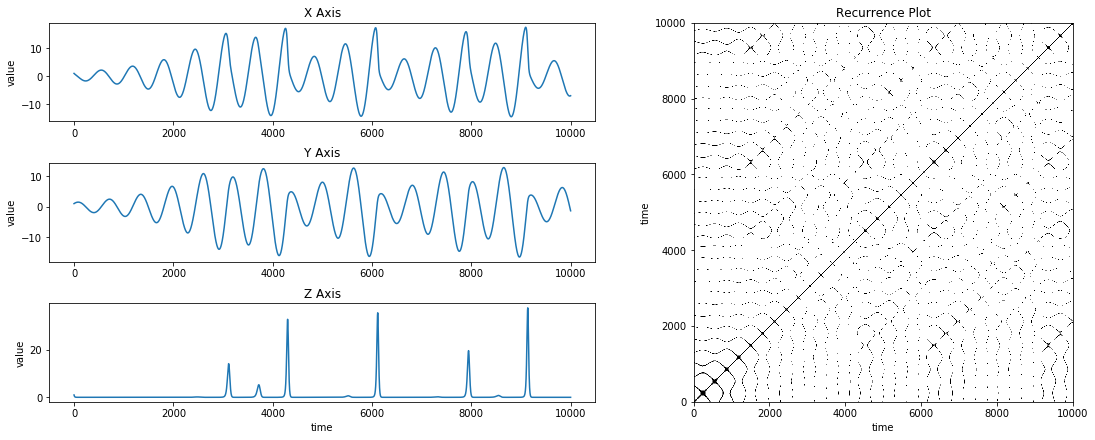

In [15]:
recurrence_plot_char_3d([xs, ys, zs], eps=0.2, steps=2, figsize=(16, 6))

# Lorenz atractor

In [16]:
from scipy.integrate import odeint

In [17]:
def lorenz(initial_params={'x':0, 'y':1, 'z':1.05}, 
           tmax=100, n=10000,
           lorenz_params={'sigma':10, 'beta': 2.667, 'rho': 28}):
    """
    initial_params(x0, y0, z0) -> initial conditions parameters
    tmax       -> Maximum time point
    n          -> number of points
    lorenz_params -> Lorenz parameters and initial conditions
    """
    def _lorenz(X, t, sigma, beta, rho):
        """The Lorenz equations."""
        x, y, z = X
        dx = -sigma * (x - y)
        dy = rho * x - y - x * z
        dz = -beta * z + x * y
        return dx, dy, dz
    
    # Integrate the Lorenz equations on the time grid t.
    t = np.linspace(0, tmax, n)
    f = odeint(_lorenz, 
               (initial_params['x'], initial_params['y'], initial_params['z']), 
               t, 
               args=(lorenz_params['sigma'], 
                     lorenz_params['beta'], 
                     lorenz_params['rho']))
    xs, ys, zs = f.T
    return xs, ys, zs

Criação dos parâmetros iniciais para o atrator de Lorenz

In [18]:
xs, ys, zs = lorenz(initial_params={'x':0, 'y':1, 'z':1.05}, 
                    tmax=100, n=10000, 
                    lorenz_params={'sigma':10, 'beta': 2.667, 'rho': 28})

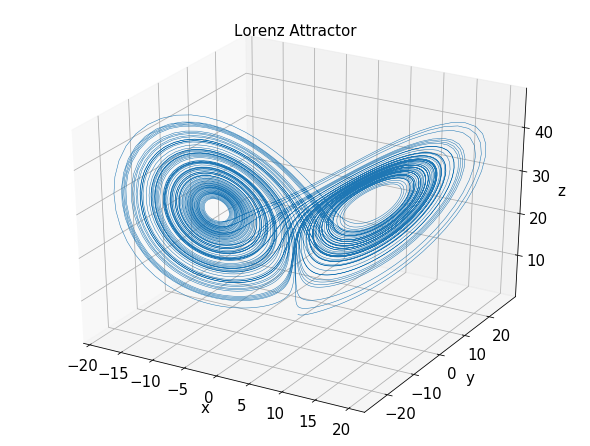

In [19]:
plot_3d(xs, ys, zs, title='Lorenz Attractor', fig=(8,6))

### Recurrence Plot do eixo X do Atrator de Lorenz

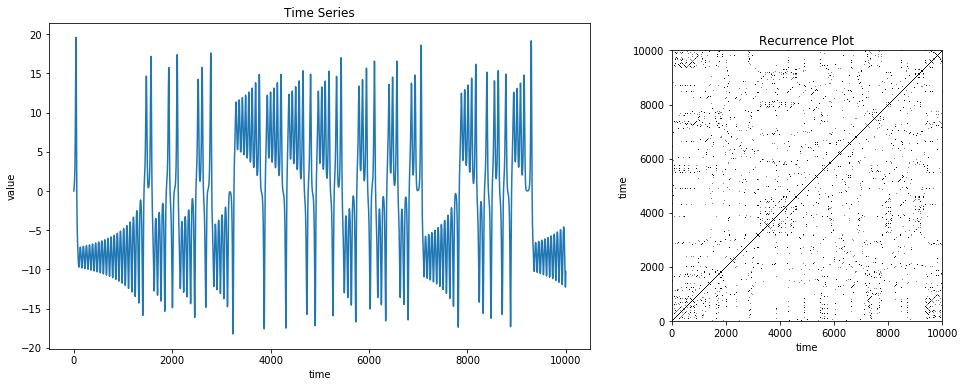

In [20]:
recurrence_plot_char_1d(xs, eps=0.2, steps=2, figsize=(16, 6))

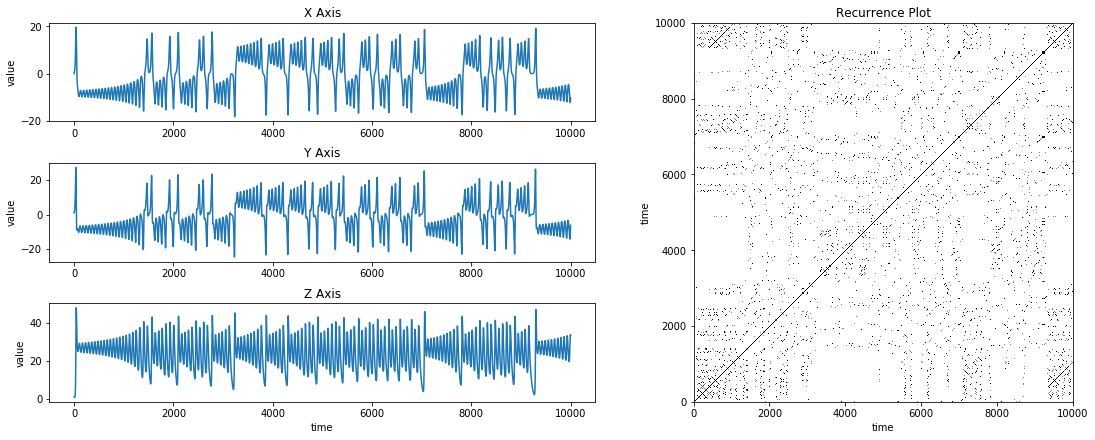

In [21]:
recurrence_plot_char_3d([xs, ys, zs], eps=0.2, steps=2, figsize=(16, 6))